# Machine Learning for Mechanical Engineering
# Homework 4
## 20172050 박규남

## Problem 1

### Step 1. Load data

In [1]:
from six.moves import cPickle
digit0 = cPickle.load(open('./data/digit0.pkl', 'rb'))
digit1 = cPickle.load(open('./data/digit1.pkl', 'rb'))

In [2]:
digit0.shape

(500, 28, 28)

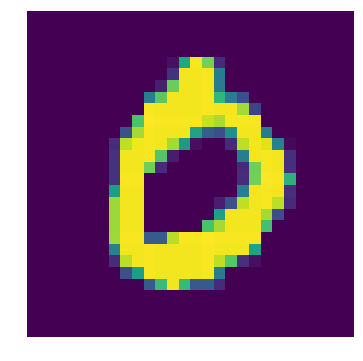

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.imshow(digit0[0])
plt.axis('off')
plt.show()

### Step 2. Extract features

#### (b) 

In [4]:
import numpy as np

In [5]:
feature_vector = []
#The average value of pixels located at the center of the image ([9:18, 9:18])
row_means=[]
for img in digit0:
    for x in img[9:18]:
        row_means.append(x.mean())
    center_mean = np.array(row_means).mean()
    entire_mean = img.mean()
    feature_vector.append([center_mean,entire_mean,1])
feature_matrix_0 = np.matrix(feature_vector)
feature_matrix_0.shape

(500, 3)

In [6]:
feature_vector = []
#The average value of pixels located at the center of the image ([9:18, 9:18])
row_means=[]
for img in digit1:
    for x in img[9:18]:
        row_means.append(x.mean())
    center_mean = np.array(row_means).mean()
    entire_mean = img.mean()
    feature_vector.append([center_mean,entire_mean,1])
feature_matrix_1 = np.matrix(feature_vector)
feature_matrix_1.shape

(500, 3)

#### (c)

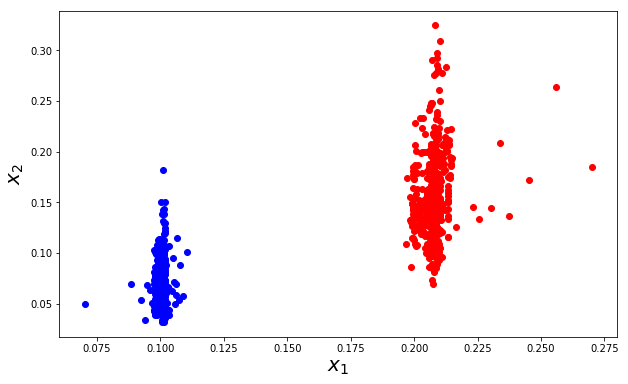

In [7]:
plt.figure(figsize=(10,6))
plt.plot(feature_matrix_0[:,0], feature_matrix_0[:,1],'ro', label='0')
plt.plot(feature_matrix_1[:,0], feature_matrix_1[:,1],'bo', label='1')
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.show()

## Problem 2

#### (a)

In [8]:
X = np.vstack([feature_matrix_0, feature_matrix_1])
y = np.vstack([np.ones([feature_matrix_0.shape[0],1]), -np.ones([feature_matrix_1.shape[0],1])],)

X = np.asmatrix(X)
y = np.asmatrix(y)

In [9]:
from random import randint


w = np.ones([3,1])
w = np.asmatrix(w)

n_iter = 100

for k in range(n_iter):
    for j in range(n_iter):
        i = randint(0,999)
        y_hat = np.sign(X[i,:]*w)[0,0]
        if y_hat != y[i,0]:
            w += y[i,0]*X[i,:].T
print(w)
        

[[ 3.89076161]
 [ 2.99405279]
 [-1.        ]]


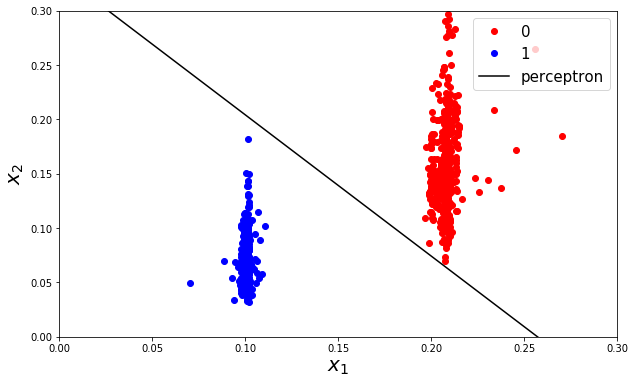

In [10]:
x1p = np.linspace(0,0.3,100).reshape(-1,1)
x2p = -w[0,0]/w[1,0]*x1p - w[2,0]/w[1,0]

plt.figure(figsize=(10,6))
plt.plot(feature_matrix_0[:,0], feature_matrix_0[:,1],'ro', label='0')
plt.plot(feature_matrix_1[:,0], feature_matrix_1[:,1],'bo', label='1')
plt.plot(x1p,x2p,c='k', label='perceptron')
plt.xlim([0,0.3])
plt.ylim([0,0.3])
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.legend(loc = 1, fontsize=15)
plt.show()

## Problem 3

#### (a)

In [11]:
import cvxpy as cvx
g = 1
N = digit0.shape[0]
M = digit1.shape[0]
w = cvx.Variable(3,1)
u = cvx.Variable(N,1)
v = cvx.Variable(M,1)
obj = cvx.Minimize(cvx.norm(w,2) + g*(np.ones((1,N))*u+ np.ones((1,M))*v))
const = [feature_matrix_0*w >= 1-u, feature_matrix_1*w <= -(1-v), u>= 0, v >= 0]
prob = cvx.Problem(obj, const).solve()
w = w.value
w

matrix([[20.59551671],
        [ 1.43276691],
        [-3.28854231]])

#### (b)

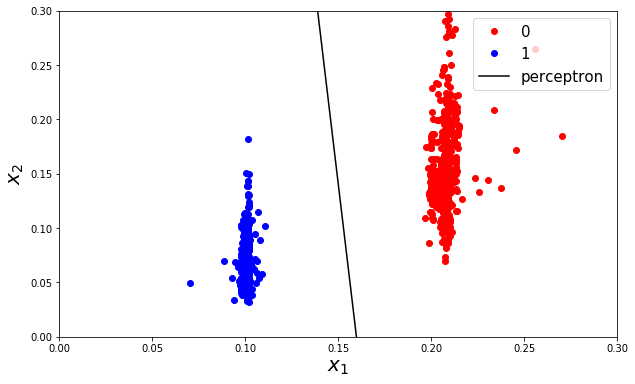

In [12]:
x1p = np.linspace(0,0.3,100).reshape(-1,1)
x2p = -w[0,0]/w[1,0]*x1p - w[2,0]/w[1,0]

plt.figure(figsize=(10,6))
plt.plot(feature_matrix_0[:,0], feature_matrix_0[:,1],'ro', label='0')
plt.plot(feature_matrix_1[:,0], feature_matrix_1[:,1],'bo', label='1')
plt.plot(x1p,x2p,c='k', label='perceptron')
plt.xlim([0,0.3])
plt.ylim([0,0.3])
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.legend(loc = 1, fontsize=15)
plt.show()

## Problem 5

#### (b)

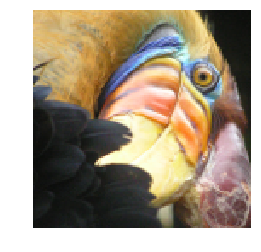

Matrix shape: (128, 128, 3)


In [13]:
from six.moves import cPickle
import matplotlib.pyplot as plt

A = cPickle.load(open('./data/bird.pkl', 'rb'))

plt.figure(figsize=(4, 4))
plt.imshow(A.astype('uint8'))
plt.axis('off')
plt.show()

print('Matrix shape: {}'.format(A.shape))

#### (c)

In [50]:
k = 16
m = A.shape[0]

mu = []
for i in range(k):
    mu.append(list(A[np.random.randint(0,127)][np.random.randint(0,127)]))
pre_mu = mu.copy()
mu

[[228, 116, 50],
 [112, 83, 44],
 [202, 178, 125],
 [147, 120, 112],
 [187, 142, 74],
 [253, 249, 195],
 [208, 170, 96],
 [27, 29, 25],
 [251, 253, 202],
 [20, 22, 23],
 [161, 131, 108],
 [202, 170, 100],
 [252, 253, 215],
 [209, 177, 106],
 [207, 165, 97],
 [253, 163, 89]]

In [51]:
y = np.empty([m,m,1])

for n_iter in range(50):
    for i in range(m):
        for j in range(m):
            d = []
            for x in range(k):
                d.append(np.linalg.norm(A[i,j,:] - mu[x][:],2))
            y[i,j] = np.argmin(d)
    err = 0
    for i in range(k):
        print(len(A[np.where(y==i)[0]]))
        if len(A[np.where(y==i)[0]]) == 0:
            continue
        mu[i] = np.mean(np.mean(A[np.where(y==i)[0]],axis=0),axis=0)
        err += np.linalg.norm(pre_mu[i][:] - mu[i][:],2)
    pre_mu = mu.copy()
    print(mu)

    if err < 1e-10:
        print("Iteration", n_iter)
        break;
    else:
        print("Iteration", n_iter)

278
2765
2528
345
794
133
249
4130
69
791
1124
207
2188
571
55
157
[array([151.3716558 , 125.28701102,  97.8638152 ]), array([137.683954  , 118.61812274,  90.38053797]), array([147.9204936 , 128.49753078, 101.83598695]), array([133.63788496, 116.82683424,  91.97760417]), array([154.95745435, 132.88480006,  95.25527393]), array([149.20647321, 135.32524671, 111.82730263]), array([154.48691642, 132.35940638,  92.63246737]), array([125.98524516, 108.43866147,  86.76894295]), array([154.2955163 , 139.68240489, 113.9127038 ]), array([102.26021255,  90.04145267,  74.84392778]), array([138.9704529 , 122.34633563,  96.72998916]), array([148.49550876, 129.79555405,  94.23350694]), array([125.76216865, 110.71024837,  85.94530536]), array([152.02245239, 131.88589098,  92.56965576]), array([154.89318182, 129.58423295,  98.66889205]), array([153.9957703 , 131.70252787, 102.75368232])]
Iteration 0
95
228
38
104
599
341
1321
365
5957
6753
150
12
301
29
41
50
[array([123.37713816, 102.08536184,  82.483

106
162
6410
39
12
105
1321
16
353
14
442
189
6533
65
379
238
[array([106.72936321,  89.09758255,  73.64010908]), array([128.59524498, 110.42351466,  88.00188079]), array([120.005459  , 104.24697738,  83.08655543]), array([110.70132212,  94.67227564,  76.36298077]), array([121.45052083, 104.23893229,  75.53515625]), array([128.58668155, 112.79590774,  90.38005952]), array([151.74206922, 128.46198429,  96.02728757]), array([102.55419922,  89.24560547,  70.44189453]), array([135.31588615, 116.54355524,  88.64376771]), array([119.59654018, 104.14955357,  78.60546875]), array([137.07331731, 120.14007706,  93.97465356]), array([151.67948082, 128.69907407, 100.77719907]), array([146.89037746, 127.99005171,  98.55038004]), array([103.08269231,  88.51418269,  72.48209135]), array([150.28498104, 128.85044937,  97.13712071]), array([138.23470326, 120.27435662,  90.89945509])]
Iteration 10
154
83
143
152
540
242
1924
5873
192
11
192
6236
138
445
9
50
[array([106.31260146,  87.86891234,  71.942978

571
68
375
221
205
385
7123
310
112
42
496
112
261
5798
96
209
[array([153.7534479 , 130.37194888,  98.01670589]), array([129.24299173, 112.28917739,  87.62729779]), array([148.7275625 , 128.19410417,  95.2535625 ]), array([125.75735294, 107.73331448,  85.17986425]), array([113.14519817,  97.83292683,  80.18574695]), array([135.86913555, 119.09786932,  93.70734578]), array([147.8717447 , 128.32893992,  98.33560298]), array([143.82255544, 127.55849294,  98.74621976]), array([143.7172154 , 123.01764788,  96.18882533]), array([106.06733631,  93.36160714,  71.13095238]), array([129.83960748, 110.88221396,  87.3452936 ]), array([114.53759766,  97.02587891,  79.54813058]), array([133.96518798, 113.40786638,  89.58896073]), array([119.32948727, 103.85457539,  82.8616953 ]), array([105.57389323,  90.52986654,  74.17838542]), array([140.4691238 , 121.3574686 ,  90.88266298])]
Iteration 20
7539
43
153
236
156
191
54
513
76
604
105
141
109
135
6017
312
[array([148.07867734, 128.29149154,  98.2348

329
312
7589
63
118
6282
403
131
121
223
166
72
168
105
66
236
[array([139.85638298, 121.53212861,  91.01816584]), array([146.4373748 , 129.20888421,  98.84319912]), array([147.8277791 , 128.24827052,  98.19499131]), array([104.28695437,  89.4156746 ,  73.01661706]), array([102.89380297,  86.13241525,  71.49794756]), array([119.94489215, 104.18906076,  83.08046925]), array([151.26698201, 129.75725031,  97.2983871 ]), array([135.80868321, 119.57919847,  91.43225191]), array([140.43143079, 120.39417614,  94.61602531]), array([134.93714966, 118.69324552,  94.4103139 ]), array([135.22703313, 113.29005083,  89.95331325]), array([145.50585937, 124.85297309,  97.80805122]), array([134.20517113, 111.19731213,  89.59923735]), array([112.1015625 ,  96.92276786,  80.51830357]), array([103.32481061,  88.60464015,  73.7014678 ]), array([135.4661679 , 116.45888506,  88.96232786])]
Iteration 30
221
718
14
123
6221
363
7345
8
46
268
11
114
209
302
186
235
[array([149.42707155, 128.43304581,  95.874222

356
84
246
342
256
166
7655
266
22
324
10
5967
196
128
343
23
[array([136.78412482, 119.97412658,  93.27036517]), array([107.55989583,  93.12853423,  76.77883185]), array([131.69769436, 115.54760544,  92.29449314]), array([150.8794545 , 126.92626096,  98.56268275]), array([144.13671875, 123.74035645,  92.80593872]), array([138.77296687, 119.09798569,  93.86987011]), array([148.31135185, 128.46908067,  98.28701523]), array([138.13099154, 120.43885103,  89.86439732]), array([115.13565341,  99.11612216,  79.49289773]), array([136.4493152 , 120.06004051,  94.76364776]), array([129.5390625, 108.9984375,  84.5828125]), array([118.52178256, 103.20281601,  82.38481701]), array([134.95356346, 114.50027902,  88.93431122]), array([131.98059082, 113.82391357,  87.43804932]), array([124.74933947, 106.05188593,  84.65923378]), array([109.39096467,  96.26392663,  74.69938859])]
Iteration 40
0
6278
194
7221
339
55
721
122
113
206
399
127
51
17
88
453
[array([136.78412482, 119.97412658,  93.27036517]),

In [55]:
mu

[array([137.05850205, 119.76096684,  88.57365023]),
 array([109.41080014,  93.02764423,  75.87448489]),
 array([138.41503906, 121.51642072,  96.68778935]),
 array([127.6573227 , 108.51028174,  85.31974579]),
 array([131.24714177, 112.60162602,  89.11401169]),
 array([143.74987088, 125.98543106, 100.78932459]),
 array([120.54064941, 105.99206543,  85.56567383]),
 array([132.859313  , 112.69075521,  89.41480655]),
 array([121.37825521, 105.16601562,  82.92447917]),
 array([119.56537905, 104.03063249,  82.99017269]),
 array([111.10830479,  92.87532106,  76.28660103]),
 array([131.0329998 , 112.55402208,  87.86684247]),
 array([151.87433709, 130.33256268,  95.61670903]),
 array([132.32830564, 113.33250542,  87.00975434]),
 array([131.13701923, 114.79731571,  90.06650641]),
 array([123.67578125, 108.73681641,  83.81347656])]

In [62]:
y[0,0,0]

12.0

In [64]:
for i in range(m):
    for j in range(m):
        A[i][j] = mu[int(y[i,j,0])]
A

array([[[151, 130,  95],
        [151, 130,  95],
        [151, 130,  95],
        ...,
        [119, 104,  82],
        [119, 104,  82],
        [119, 104,  82]],

       [[151, 130,  95],
        [151, 130,  95],
        [151, 130,  95],
        ...,
        [119, 104,  82],
        [119, 104,  82],
        [119, 104,  82]],

       [[151, 130,  95],
        [151, 130,  95],
        [151, 130,  95],
        ...,
        [119, 104,  82],
        [119, 104,  82],
        [119, 104,  82]],

       ...,

       [[119, 104,  82],
        [119, 104,  82],
        [119, 104,  82],
        ...,
        [119, 104,  82],
        [119, 104,  82],
        [119, 104,  82]],

       [[119, 104,  82],
        [119, 104,  82],
        [119, 104,  82],
        ...,
        [119, 104,  82],
        [119, 104,  82],
        [119, 104,  82]],

       [[119, 104,  82],
        [119, 104,  82],
        [119, 104,  82],
        ...,
        [119, 104,  82],
        [119, 104,  82],
        [119, 104,  82]]

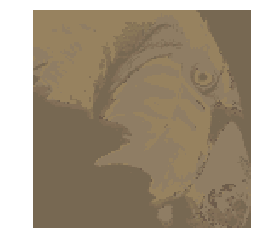

In [65]:
plt.figure(figsize=(4, 4))
plt.imshow(A.astype('uint8'))
plt.axis('off')
plt.show()